In [6]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import pandas as pd

%matplotlib inline

In [7]:
from mockobservation_tools.galaxy_tools import load_sim_FIREBox


Files have been placed in GreenPlanet by Prof. Jorge Moreno\
Assume simulation units from Moreno Data\
ahf_path contains particle ids

Path to data DFS-L/DATA/cosmo/jgmoren1/FIREBox/

The z=0 directory is 1200

The individual halos are for the 1200 snap directory: objects_1200

The particles that are bound are contained in directory: ahf_objects_1200

The particles are saved as physical units 


### Data Format 

Particle type 0 = gas\
Particle type 1 = dark matter\
Particle type 4 = stars 


In [8]:
snap_files = glob.glob('/DFS-L/DATA/cosmo/jgmoren1/FIREBox/FB15N1024/objects_1200/' +'*.hdf5')
snap_files

['/DFS-L/DATA/cosmo/jgmoren1/FIREBox/FB15N1024/objects_1200/object_1974.hdf5',
 '/DFS-L/DATA/cosmo/jgmoren1/FIREBox/FB15N1024/objects_1200/object_1508.hdf5',
 '/DFS-L/DATA/cosmo/jgmoren1/FIREBox/FB15N1024/objects_1200/object_462.hdf5',
 '/DFS-L/DATA/cosmo/jgmoren1/FIREBox/FB15N1024/objects_1200/object_1810.hdf5',
 '/DFS-L/DATA/cosmo/jgmoren1/FIREBox/FB15N1024/objects_1200/object_506.hdf5',
 '/DFS-L/DATA/cosmo/jgmoren1/FIREBox/FB15N1024/objects_1200/object_6871.hdf5',
 '/DFS-L/DATA/cosmo/jgmoren1/FIREBox/FB15N1024/objects_1200/object_855.hdf5',
 '/DFS-L/DATA/cosmo/jgmoren1/FIREBox/FB15N1024/objects_1200/object_429.hdf5',
 '/DFS-L/DATA/cosmo/jgmoren1/FIREBox/FB15N1024/objects_1200/object_1543.hdf5',
 '/DFS-L/DATA/cosmo/jgmoren1/FIREBox/FB15N1024/objects_1200/object_931.hdf5',
 '/DFS-L/DATA/cosmo/jgmoren1/FIREBox/FB15N1024/objects_1200/object_175.hdf5',
 '/DFS-L/DATA/cosmo/jgmoren1/FIREBox/FB15N1024/objects_1200/object_2214.hdf5',
 '/DFS-L/DATA/cosmo/jgmoren1/FIREBox/FB15N1024/objects_120

In [9]:
object_ids=[]

for file in snap_files:
    ids = file.split('/')[-1].split('_')[1][:-5] 
    object_ids = np.append(object_ids,ids)
    
object_ids.sort()

In [10]:
obj_masses = pd.DataFrame(columns=['object_id', 'object_Mstar', 'object_Mgas', 'object_Mvir', 'object_groupID'])

for file in snap_files:
    f = h5py.File(file, 'r')
    
    obj_masses = obj_masses.append({'object_id':file.split('/')[-1].split('_')[1][:-5], 
                                    'object_Mstar':np.log10(f['object_Mstar'][()]), 
                                    'object_Mgas':np.log10(f['object_Mgas'][()]), 
                                    'object_Mvir':np.log10(f['object_Mvir'][()]), 
                                    'object_groupID':f['object_groupID'][()]}
                                    ,ignore_index=True)

    f.close()
    

/export/nfs0home/kleinca/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


In [49]:
obj_masses.sort_values(by=['object_Mvir'])

,object_id,object_Mstar,object_Mgas,object_Mvir,object_groupID
1657,49407,6.749110,-inf,7.943534,12
1505,46322,6.604025,-inf,8.038914,2
1360,10928,8.120919,-inf,8.138476,10
1077,35974,6.713556,-inf,8.169572,2
433,30409,7.019328,-inf,8.188039,0
...,...,...,...,...,...
571,5,11.371057,11.291955,12.644463,-1
914,3,11.622344,11.458044,12.685291,-1
1555,2,11.808663,11.733022,12.923597,-1
495,1,11.738131,11.915174,12.963360,-1


In [20]:
obj_masses.to_csv('/export/nfs0home/kleinca/FIREBox_MockImage/data/FIREBox_Galaxy_Params.csv', index=False)

In [21]:
test = pd.read_csv('/export/nfs0home/kleinca/FIREBox_MockImage/data/FIREBox_Galaxy_Params.csv')

In [22]:
test

,object_id,object_Mstar,object_Mgas,object_Mvir,object_groupID
0,1974,6.648143,8.019976,9.715688,-1
1,1508,6.851902,8.267073,9.853485,-1
2,462,9.103253,9.196508,10.512607,0
3,1810,7.460666,8.161137,9.746591,-1
4,506,8.637731,9.471713,10.416013,-1
...,...,...,...,...,...
1715,427,8.979617,9.462230,10.528822,-1
1716,67,10.048376,9.878034,11.565880,-1
1717,1011,6.912739,8.145190,10.130967,-1
1718,1292,7.439618,8.588238,9.912380,-1


In [13]:
hosts = obj_masses.mask(obj_masses["object_groupID"] == -1)
sat = obj_masses.mask(obj_masses["object_groupID"] >-1)

In [56]:
hosts

,object_id,object_Mstar,object_Mgas,object_Mvir,object_groupID
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,462,9.103253,9.196508,10.512607,0
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1715,NaN,NaN,NaN,NaN,NaN
1716,NaN,NaN,NaN,NaN,NaN
1717,NaN,NaN,NaN,NaN,NaN
1718,NaN,NaN,NaN,NaN,NaN


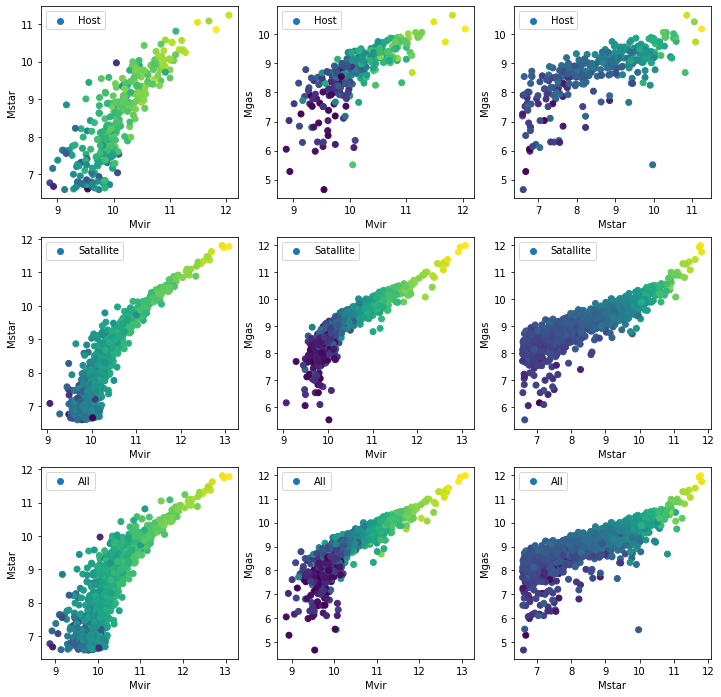

In [14]:
fig, axs = plt.subplots(3,3,figsize=(12, 12))

axs[0,0].scatter(hosts['object_Mvir'],hosts['object_Mstar'],c=hosts['object_Mgas'],label='Host')
axs[0,0].set_xlabel('Mvir')
axs[0,0].set_ylabel('Mstar')
axs[0,0].legend()


axs[0,1].scatter(hosts['object_Mvir'],hosts['object_Mgas'],c=hosts['object_Mstar'],label='Host')
axs[0,1].set_xlabel('Mvir')
axs[0,1].set_ylabel('Mgas')
axs[0,1].legend()

axs[0,2].scatter(hosts['object_Mstar'],hosts['object_Mgas'],c=hosts['object_Mvir'],label='Host')
axs[0,2].set_xlabel('Mstar')
axs[0,2].set_ylabel('Mgas')
axs[0,2].legend()


axs[1,0].scatter(sat['object_Mvir'],sat['object_Mstar'],c=sat['object_Mgas'],label='Satallite')
axs[1,0].set_xlabel('Mvir')
axs[1,0].set_ylabel('Mstar')
axs[1,0].legend()


axs[1,1].scatter(sat['object_Mvir'],sat['object_Mgas'],c=sat['object_Mstar'],label='Satallite')
axs[1,1].set_xlabel('Mvir')
axs[1,1].set_ylabel('Mgas')
axs[1,1].legend()


axs[1,2].scatter(sat['object_Mstar'],sat['object_Mgas'],c=sat['object_Mvir'],label='Satallite')
axs[1,2].set_xlabel('Mstar')
axs[1,2].set_ylabel('Mgas')
axs[1,2].legend()


axs[2,0].scatter(obj_masses['object_Mvir'],obj_masses['object_Mstar'],c=obj_masses['object_Mgas'],label='All')
axs[2,0].set_xlabel('Mvir')
axs[2,0].set_ylabel('Mstar')
axs[2,0].legend()


axs[2,1].scatter(obj_masses['object_Mvir'],obj_masses['object_Mgas'],c=obj_masses['object_Mstar'],label='All')
axs[2,1].set_xlabel('Mvir')
axs[2,1].set_ylabel('Mgas')
axs[2,1].legend()


axs[2,2].scatter(obj_masses['object_Mstar'],obj_masses['object_Mgas'],c=obj_masses['object_Mvir'],label='All')
axs[2,2].set_xlabel('Mstar')
axs[2,2].set_ylabel('Mgas')
axs[2,2].legend()

#plt.savefig('/export/nfs0home/kleinca/FIREBox_MockImage/Figures/Mass_comparison.pdf')

plt.show()

In [25]:
obj_path = '/DFS-L/DATA/cosmo/jgmoren1/FIREBox/FB15N1024/objects_1200/object_1.hdf5'
ahf_path = '/DFS-L/DATA/cosmo/jgmoren1/FIREBox/FB15N1024/ahf_objects_1200/ahf_object_1.hdf5'
    

In [26]:
f = h5py.File(obj_path, 'r')


In [27]:
f.keys()

<KeysViewHDF5 ['dm_id', 'dm_mass', 'dm_vx', 'dm_vy', 'dm_vz', 'dm_x', 'dm_y', 'dm_z', 'gas_hsml', 'gas_id', 'gas_mass', 'gas_ne', 'gas_nh', 'gas_oxygen', 'gas_rho', 'gas_sfr', 'gas_temperature', 'gas_total_metallicity', 'gas_u', 'gas_vx', 'gas_vy', 'gas_vz', 'gas_x', 'gas_y', 'gas_z', 'object_Mgas', 'object_Mstar', 'object_Mvir', 'object_Rvir', 'object_VXc', 'object_VYc', 'object_VZc', 'object_Xc', 'object_Yc', 'object_Zc', 'object_galaxyID', 'object_groupID', 'object_n_gas', 'object_n_particles', 'object_n_star', 'object_n_substructures', 'object_threshold_dm', 'object_threshold_gas', 'object_threshold_sfr', 'object_threshold_stars', 'redshift', 'stars_formation_time', 'stars_helium', 'stars_id', 'stars_iron', 'stars_magnesium', 'stars_mass', 'stars_total_metallicity', 'stars_vx', 'stars_vy', 'stars_vz', 'stars_x', 'stars_y', 'stars_z', 'time']>

In [28]:
f['object_groupID'][()]

-1

In [41]:
globalparams_path = "/DFS-L/DATA/cosmo/jgmoren1/FIREBox/FB15N1024/global_sample_data/global_sample_data_snapshot_1200.hdf5"


In [42]:
globalparams = h5py.File(globalparams_path, 'r')


In [43]:
globalparams.keys()

<KeysViewHDF5 ['Mgas_ahf_cat', 'Mstar_ahf_cat', 'Mvir_ahf_cat', 'Redge', 'Redge_ahf', 'Rvir', 'Rvir_ahf', 'Rvir_ahf_cat', 'Xc_ahf_cat', 'Yc_ahf_cat', 'Zc_ahf_cat', 'dm_mass_within_r30_dm', 'dm_mass_within_r30_dm_ahf', 'dm_mass_within_r30_gas', 'dm_mass_within_r30_gas_ahf', 'dm_mass_within_r30_stars', 'dm_mass_within_r30_stars_ahf', 'dm_mass_within_r50_dm', 'dm_mass_within_r50_dm_ahf', 'dm_mass_within_r50_gas', 'dm_mass_within_r50_gas_ahf', 'dm_mass_within_r50_stars', 'dm_mass_within_r50_stars_ahf', 'dm_mass_within_r80_dm', 'dm_mass_within_r80_dm_ahf', 'dm_mass_within_r80_gas', 'dm_mass_within_r80_gas_ahf', 'dm_mass_within_r80_stars', 'dm_mass_within_r80_stars_ahf', 'galaxyID', 'gas_mass_within_r30_dm', 'gas_mass_within_r30_dm_ahf', 'gas_mass_within_r30_gas', 'gas_mass_within_r30_gas_ahf', 'gas_mass_within_r30_stars', 'gas_mass_within_r30_stars_ahf', 'gas_mass_within_r50_dm', 'gas_mass_within_r50_dm_ahf', 'gas_mass_within_r50_gas', 'gas_mass_within_r50_gas_ahf', 'gas_mass_within_r50_sta

In [45]:
globalparams['Mgas_ahf_cat'][:]

array([9.51286e+11, 8.22573e+11, 5.40782e+11, ..., 0.00000e+00,
       0.00000e+00, 0.00000e+00])

In [6]:
f.keys()

<KeysViewHDF5 ['dm_id', 'dm_mass', 'dm_vx', 'dm_vy', 'dm_vz', 'dm_x', 'dm_y', 'dm_z', 'gas_hsml', 'gas_id', 'gas_mass', 'gas_ne', 'gas_nh', 'gas_oxygen', 'gas_rho', 'gas_sfr', 'gas_temperature', 'gas_total_metallicity', 'gas_u', 'gas_vx', 'gas_vy', 'gas_vz', 'gas_x', 'gas_y', 'gas_z', 'object_Mgas', 'object_Mstar', 'object_Mvir', 'object_Rvir', 'object_VXc', 'object_VYc', 'object_VZc', 'object_Xc', 'object_Yc', 'object_Zc', 'object_galaxyID', 'object_groupID', 'object_n_gas', 'object_n_particles', 'object_n_star', 'object_n_substructures', 'object_threshold_dm', 'object_threshold_gas', 'object_threshold_sfr', 'object_threshold_stars', 'redshift', 'stars_formation_time', 'stars_helium', 'stars_id', 'stars_iron', 'stars_magnesium', 'stars_mass', 'stars_total_metallicity', 'stars_vx', 'stars_vy', 'stars_vz', 'stars_x', 'stars_y', 'stars_z', 'time']>

In [29]:
np.log10(f['object_Mstar'][()])

11.738131008780744

In [30]:
np.log10(f['object_Mgas'][()])

11.915174450196917

In [31]:
np.log10(f['object_Mvir'][()])

12.963360403489967

(-500.0, 500.0)

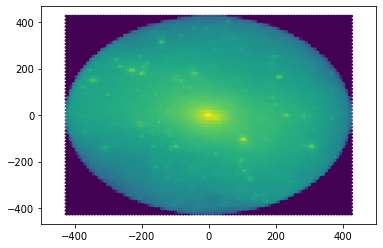

In [32]:
plt.hexbin(f['dm_x'][:],f['dm_y'][:],bins='log')


(-500.0, 500.0)

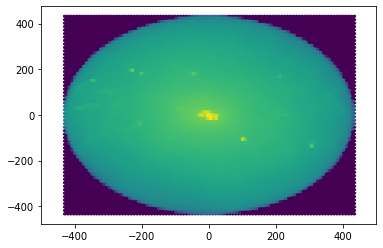

In [33]:
plt.hexbin(f['gas_x'],f['gas_y'],bins='log')


(-500.0, 500.0)

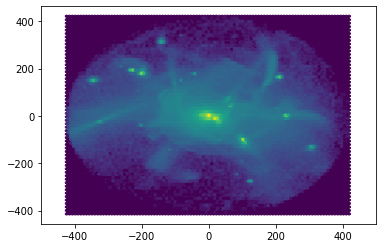

In [34]:
plt.hexbin(f['stars_x'],f['stars_y'],bins='log')


In [12]:
f = h5py.File(obj_path, 'r')

if ahf_path is None:
    # if no ahf then no mask, all elements are true
    gas_mask  = np.full(np.shape(f['gas_x']), True)
    star_mask  = np.full(np.shape(f['stars_x']), True)
else:
    ahf = h5py.File(ahf_path, 'r')

    #Gas
    gas_ids =  ahf['particleIDs'][ahf['partTypes'][:]==1]
    gas_mask = np.in1d(f['gas_id'],gas_ids)

    #Stars
    star_ids = ahf['particleIDs'][ahf['partTypes'][:]==4]
    star_mask = np.in1d(f['stars_id'],star_ids)


h = 0.6774
z_snap = f['redshift'][()]
a_snap = 1/(1+z_snap)

#Unit conversion 
if mass_unit == 'physical':
    mass_conversion = 1
elif mass_unit == 'simulation':
    mass_conversion = (10**10)/h


if length_unit == 'physical':
    length_conversion = 1
elif length_unit == 'simulation':
    length_conversion = a_snap/h


Mvir, Rvir = f['object_Mvir'][()]*mass_conversion, f['object_Rvir'][()]*length_conversion

gas_snapdict  = {'h':np.empty(0),'a':np.empty(0), 'Rvir':np.empty(0), 'Mvir':np.empty(0),
                 'Coordinates':np.empty((0,3)),'Velocities':np.empty((0,3)),
                 'Masses':np.empty(0),'Metallicity':np.empty(0),
                 'hsml':np.empty(0), 'ParticleIDs':np.empty(0),
                 'r':np.empty(0),'r_xy':np.empty(0),'r_yz':np.empty(0),'r_zx':np.empty(0)}

star_snapdict = {'h':np.empty(0),'a':np.empty(0), 'Rvir':np.empty(0), 'Mvir':np.empty(0),
                 'Coordinates':np.empty((0,3)),'Velocities':np.empty((0,3)), 
                 'Masses':np.empty(0),'Metallicity':np.empty(0),
                 'hsml':np.empty(0), 'ParticleIDs':np.empty(0),
                 'StellarFormationTime':np.empty(0), 'StellarAge':np.empty(0),
                 'r':np.empty(0),'r_xy':np.empty(0),'r_yz':np.empty(0),'r_zx':np.empty(0)}


#Load Gas Particles
gas_snapdict['h'] = h
gas_snapdict['a'] = a_snap
gas_snapdict['Rvir'] = Rvir
gas_snapdict['Mvir'] = Mvir

gas_snapdict['Coordinates'] = np.array([f['gas_x'][gas_mask]*length_conversion,
                                        f['gas_y'][gas_mask]*length_conversion,
                                        f['gas_z'][gas_mask]*length_conversion
                                       ]).T

gas_snapdict['r'] = (gas_snapdict['Coordinates'][:,0]**2 + 
                     gas_snapdict['Coordinates'][:,1]**2 + 
                     gas_snapdict['Coordinates'][:,2]**2) ** 0.5
gas_snapdict['r_xy'] = (gas_snapdict['Coordinates'][:,0]**2 + gas_snapdict['Coordinates'][:,1]**2) ** 0.5
gas_snapdict['r_yz'] = (gas_snapdict['Coordinates'][:,1]**2 + gas_snapdict['Coordinates'][:,2]**2) ** 0.5
gas_snapdict['r_zx'] = (gas_snapdict['Coordinates'][:,2]**2 + gas_snapdict['Coordinates'][:,0]**2) ** 0.5




gas_snapdict['Velocities'] = np.array([f['gas_vx'][gas_mask],
                                       f['gas_vy'][gas_mask],
                                       f['gas_vz'][gas_mask]
                                      ]).T  

gas_snapdict['Masses']      = f['gas_mass'][gas_mask]*mass_conversion
gas_snapdict['Metallicity'] = f['gas_total_metallicity'][gas_mask]
gas_snapdict['hsml']        = f['gas_hsml'][gas_mask]
gas_snapdict['ParticleIDs'] = f['gas_id'][gas_mask]



#Load Star Particles
star_snapdict['h'] = h
star_snapdict['a'] = a_snap
star_snapdict['Rvir'] = Rvir
star_snapdict['Mvir'] = Mvir

star_snapdict['Coordinates'] = np.array([f['stars_x'][star_mask]*length_conversion,
                                         f['stars_y'][star_mask]*length_conversion,
                                         f['stars_z'][star_mask]*length_conversion
                                        ]).T

star_snapdict['r'] = (star_snapdict['Coordinates'][:,0]**2 + 
                      star_snapdict['Coordinates'][:,1]**2 + 
                      star_snapdict['Coordinates'][:,2]**2) ** 0.5
star_snapdict['r_xy'] = (star_snapdict['Coordinates'][:,0]**2 + star_snapdict['Coordinates'][:,1]**2) ** 0.5
star_snapdict['r_yz'] = (star_snapdict['Coordinates'][:,1]**2 + star_snapdict['Coordinates'][:,2]**2) ** 0.5
star_snapdict['r_zx'] = (star_snapdict['Coordinates'][:,2]**2 + star_snapdict['Coordinates'][:,0]**2) ** 0.5


star_snapdict['Velocities'] = np.array([f['stars_vx'][star_mask],
                                        f['stars_vy'][star_mask],
                                        f['stars_vz'][star_mask]
                                       ]).T   

star_snapdict['Masses']      = f['stars_mass'][star_mask]*mass_conversion
star_snapdict['Metallicity'] = f['stars_total_metallicity'][star_mask]
star_snapdict['ParticleIDs'] = f['stars_id'][star_mask]
star_snapdict['StellarFormationTime'] = f['stars_formation_time'][star_mask]

z_form = 1/star_snapdict['StellarFormationTime'] - 1




NameError: name 'mass_unit' is not defined